In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv('datasets/StudentsPerformance_modified.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [3]:
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               943 non-null    object 
 2   parental level of education  943 non-null    object 
 3   lunch                        943 non-null    object 
 4   test preparation course      943 non-null    object 
 5   math score                   943 non-null    float64
 6   reading score                943 non-null    float64
 7   writing score                943 non-null    float64
dtypes: float64(3), object(5)
memory usage: 66.3+ KB


In [4]:
# Visualization to check for outliers

"""
Outliers are data points that fall significantly outside the overall pattern of the rest of the data.
They can be very high or very low values compared to the majority of the data points.
Outliers are extreme values that deviate from the main cluster of data.
"""

'\nOutliers are data points that fall significantly outside the overall pattern of the rest of the data.\nThey can be very high or very low values compared to the majority of the data points.\nOutliers are extreme values that deviate from the main cluster of data.\n'

<Axes: xlabel='math score', ylabel='Count'>

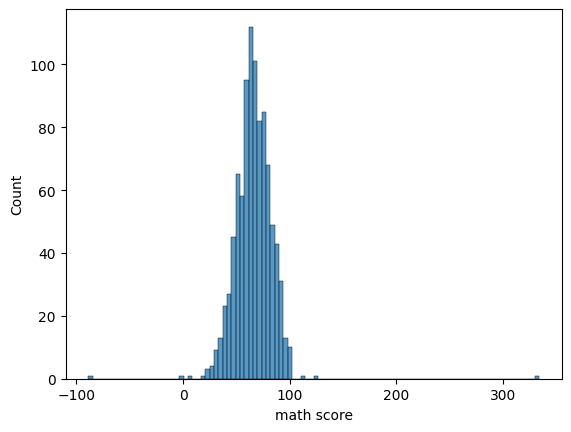

In [5]:
sb.histplot(df['math score'])

<Axes: ylabel='math score'>

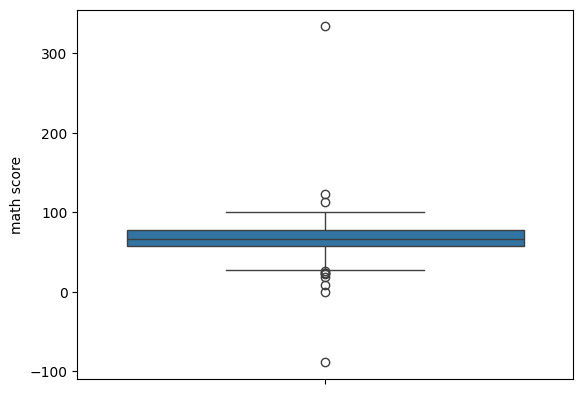

In [6]:
sb.boxplot(df['math score'])

<Axes: xlabel='reading score', ylabel='Count'>

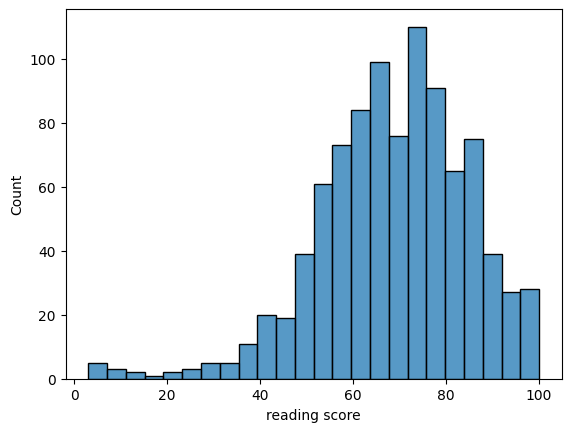

In [7]:
sb.histplot(df['reading score'])

<Axes: ylabel='reading score'>

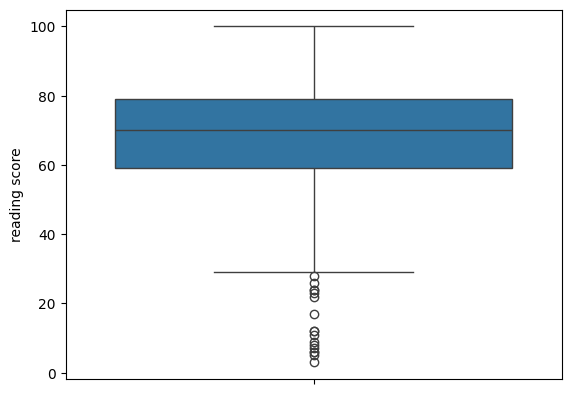

In [8]:
sb.boxplot(df['reading score'])

<Axes: xlabel='writing score', ylabel='Count'>

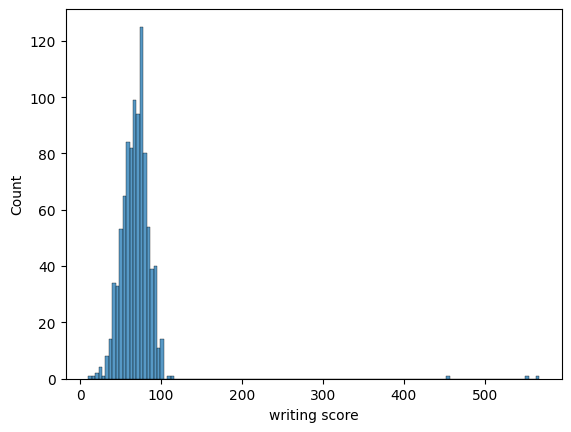

In [9]:
sb.histplot(df['writing score'])

<Axes: ylabel='writing score'>

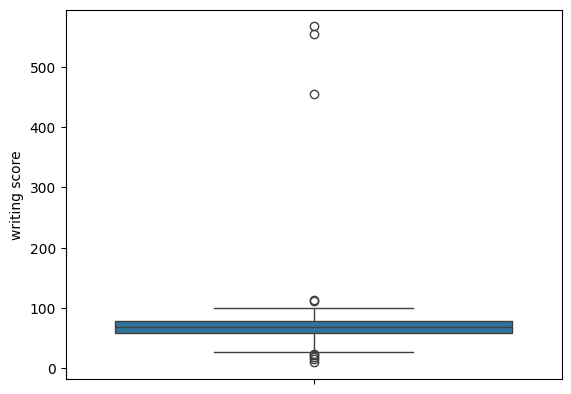

In [10]:
sb.boxplot(df['writing score'])

In [11]:
# Removing outliers

def remove_outliers_zscore(df, column_name, threshold=3):
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    outliers = abs(z_scores) > threshold
    new_df = df[~outliers]
    return new_df

def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    new_df = df[~outliers]
    return new_df